In [1]:
# Check for working notebook
print('Im Working')

Im Working


In [2]:
# NLTK imports
import nltk
from nltk.corpus import webtext
from nltk.corpus import state_union
import numpy as np
nltk.download('state_union')
nltk.download('stopwords')
nltk.download('punkt')

print("\n\n")
print('The fields are: ')
print(state_union.fileids())

[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Charx\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Charx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



The fields are: 
['1945-Truman.txt', '1946-Truman.txt', '1947-Truman.txt', '1948-Truman.txt', '1949-Truman.txt', '1950-Truman.txt', '1951-Truman.txt', '1953-Eisenhower.txt', '1954-Eisenhower.txt', '1955-Eisenhower.txt', '1956-Eisenhower.txt', '1957-Eisenhower.txt', '1958-Eisenhower.txt', '1959-Eisenhower.txt', '1960-Eisenhower.txt', '1961-Kennedy.txt', '1962-Kennedy.txt', '1963-Johnson.txt', '1963-Kennedy.txt', '1964-Johnson.txt', '1965-Johnson-1.txt', '1965-Johnson-2.txt', '1966-Johnson.txt', '1967-Johnson.txt', '1

## Stemming
### Using a porter tokenizer
First we are going to be using the Porter tokenizer to compute the word frequencies we are going to be using the 2005 State of the Union speech from GW. Bush


In [3]:
# Porter Stemming
from nltk.stem.porter import *
from nltk import word_tokenize
from nltk.corpus import stopwords 

# Set up the text to tokenize
bushUnion = state_union.raw('2005-GWBush.txt')  

# Define tokenization of the words
words = word_tokenize(bushUnion)

# Create an instance of the porter stemmer
stemmer = PorterStemmer()

# Steam the words
stemmedwords = [stemmer.stem(word) for word in words]

# Frequency distribution of the speech
#words = [word for word in state_union.words(text)]
#frequencies = nltk.FreqDist([w for w in words if len(w) > 4 and w.lower() == w])

# Set-up remove of stop words
stop_words = set(stopwords.words('english')) 

# Cleanup of the stemmed words
cleanedStemmedWords = []
for word in stemmedwords:
    # Not commas periods and applause.
    if word not in [
            ",",
            ".",
            "``",
            "''",
            ";",
            "?",
            "--",
            ")",
            "(",
            ":",
            "!",
            "applaus"
        ] and len(word) > 4 and word not in stop_words:
            cleanedStemmedWords.append(word.lower())
            
# word frequencies of the not steemed document
#frequencies = nltk.FreqDist(stemmedwords)

#for e in frequencies.most_common(10):
#    print (e)
#frequencies.plot(10)

# Perform the frequencies on the cleaned dataset
cleanedFrequencies = nltk.FreqDist(cleanedStemmedWords)
print('The most common stemmed words are: ')
for e in cleanedFrequencies.most_common(10):
    print (e)
cleanedFrequencies.plot(10)


The most common stemmed words are: 
('secur', 32)
('freedom', 21)
('america', 20)
('nation', 19)
('countri', 19)
('govern', 18)
('peopl', 18)
('american', 18)
('social', 18)
('congress', 16)


<Figure size 640x480 with 1 Axes>

## Zipf's law Verification
Plot the distribution vs the rank on a log-log scale.

Histogram of word frequencies


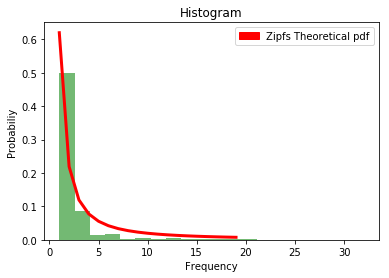

In [4]:
from nltk.probability import DictionaryProbDist
import matplotlib.pyplot as plt
from scipy import special
import matplotlib.patches as mpatches
from scipy.stats import zipf

# Using the log transformation
logCleanedFrequencies = DictionaryProbDist(cleanedFrequencies)
logCleanedFrequencies.logprob('secur')


lenght_of_document= len(cleanedStemmedWords)
# Empty object
arrayFormFrequencies = []
for key in cleanedFrequencies:
    arrayFormFrequencies.append(cleanedFrequencies[key]) 

# Log of the frequencies
logArrayFormFrequencies = np.log(arrayFormFrequencies)+1

# Plot of freq
n, bins, patches = plt.hist(arrayFormFrequencies, 20, density=True, facecolor='green', alpha=0.55)
print('Histogram of word frequencies')
plt.figure(1)

# Zipfs law shape parameter
a = 1.5
x = np.arange(1., 20.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y, linewidth=3, color='r')
# Label stuff
red_patch = mpatches.Patch(color='red', label='Zipfs Theoretical pdf')
plt.legend(handles=[red_patch])
plt.xlabel('Frequency')
plt.ylabel('Probabiliy')
plt.title('Histogram')

plt.show()

Log transformation of the histogram


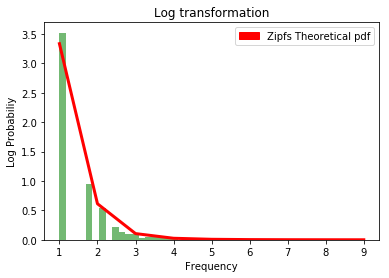

In [5]:
# Import for the zipf pmf
from scipy.stats import zipf
from scipy import special
import matplotlib.patches as mpatches

# Log of freq
histogram = plt.hist(logArrayFormFrequencies, 20, density=True, facecolor='green', alpha=0.55)
print('Log transformation of the histogram')

plt.figure(1)

# Zipfs law shape parameter
a = 5
x = np.arange(1., 10.)
y = x**(-a) / special.zetac(a)
plt.plot(x, np.log(y+1), linewidth=3, color='r')
# Label stuff
red_patch = mpatches.Patch(color='red', label='Zipfs Theoretical pdf')
plt.legend(handles=[red_patch])
plt.xlabel('Frequency')
plt.ylabel('Log Probabiliy')
plt.title('Log transformation')

plt.show()


# Document by document check
Now we are goint to repeat the process for term frequencies on all the documents

The most common words are: 
('world', 20)
('nation', 15)
('america', 11)
('peopl', 10)
('freedom', 7)
('never', 7)
('heart', 6)
('great', 6)
('human', 6)
('american', 6)


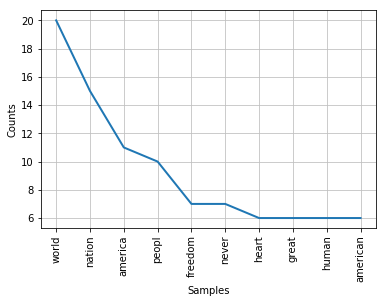

Histogram of word frequencies


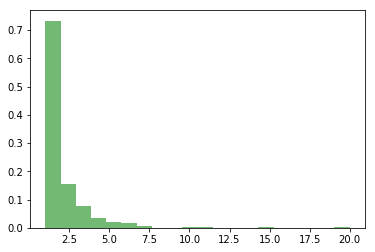

Log-Histogram of word frequencies


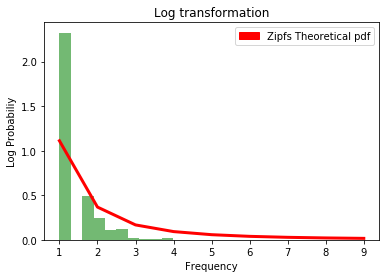

In [6]:
from scipy import stats  

def plotFrequencies(document):
    # Tokenization of the words
    words = word_tokenize(document)
    
    # Apply the Porter transformation
    stemmedwords = porterTransform(words)
    
    # Clean up the text
    cleanedWords = cleanUp(stemmedwords)
    
    # Plot the frequencies
    rawPlotFrequencies(cleanedWords)
    
    # Plot histogram
    plotHistogram(cleanedWords)
    
    # Plot Log Histogram
    plotLogHistogram(cleanedWords, 2.2)
    
# Plot Log Histogram
def plotLogHistogram(words, zipfsShape):
    # Get Freq
    cleanedFrequencies = nltk.FreqDist(words)
        
    # Transform into an array form
    arrayFormFrequencies = []
    for key in cleanedFrequencies:
        arrayFormFrequencies.append(cleanedFrequencies[key]) 

    # Log of the frequencies
    logArrayFormFrequencies = np.log(arrayFormFrequencies)+1
    
    # Plot of freq
    histogram = plt.hist(logArrayFormFrequencies, 10, density=True, facecolor='green', alpha=0.55)
    print('Log-Histogram of word frequencies')
    plt.figure(1)

    # Zipfs law shape parameter
    a = zipfsShape
    x = np.arange(1., 10.)
    y = x**(-a) / special.zetac(a)
    plt.plot(x, np.log(y+1), linewidth=3, color='r')
    # Label stuff
    red_patch = mpatches.Patch(color='red', label='Zipfs Theoretical pdf')
    plt.legend(handles=[red_patch])
    plt.xlabel('Frequency')
    plt.ylabel('Log Probabiliy')
    plt.title('Log transformation')

    plt.show()
    
# Plot the histogram
def plotHistogram(words):
    # Get Frequencies
    cleanedFrequencies = nltk.FreqDist(words)

    # Transform into an array form
    arrayFormFrequencies = []
    for key in cleanedFrequencies:
        arrayFormFrequencies.append(cleanedFrequencies[key]) 

    # Plot of freq
    n, bins, patches = plt.hist(arrayFormFrequencies, 20, density=True, facecolor='green', alpha=0.55)
    print('Histogram of word frequencies')
    plt.show()

# Plot the counts
def rawPlotFrequencies(words):
    wordDistribution = nltk.FreqDist(words)
    print('The most common words are: ')
    for e in wordDistribution.most_common(10):
        print (e)
    wordDistribution.plot(10)
    
# The porter Transformation
def porterTransform(words):
    # Create an instance of the porter stemmer
    stemmer = PorterStemmer()

    # Steam the words
    stemmedwords = [stemmer.stem(word) for word in words]
    return stemmedwords

# The clean-up and removal of stop words
def cleanUp(words):
    # Create an empty list of "clean words"
    cleanedStemmedWords = []
    for word in words:
        # Not commas periods and applause.
        if word not in [
                ",",
                ".",
                "``",
                "''",
                ";",
                "?",
                "--",
                ")",
                "(",
                ":",
                "!",
                "applaus"
            ] and len(word) > 4 and word not in stop_words:
                cleanedStemmedWords.append(word.lower())
    # Return the "cleaned dataset"
    return cleanedStemmedWords
    
fileIds = state_union.fileids()
firstDocument = fileIds[0]
# Set up the text to tokenize
currentDocument = state_union.raw(firstDocument)  

plotFrequencies(currentDocument)

#######################
Distributions of the 2006-GWBush.txt Speech.
#######################
The most common words are: 
('america', 43)
('american', 29)
('nation', 27)
('world', 27)
('peopl', 22)
('state', 18)
('countri', 17)
('freedom', 17)
('economi', 16)
('congress', 15)


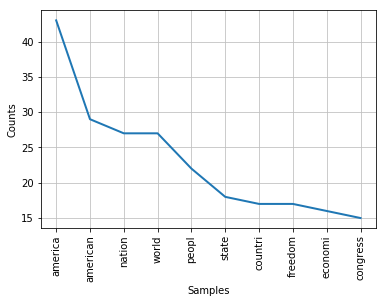

Histogram of word frequencies


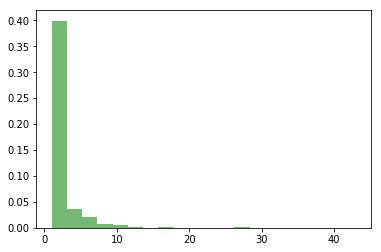

Log-Histogram of word frequencies


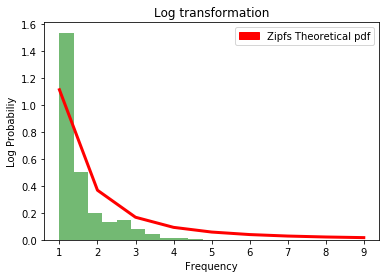

#######################
Distributions of the 1945-Truman.txt Speech.
#######################
The most common words are: 
('world', 20)
('nation', 15)
('america', 11)
('peopl', 10)
('freedom', 7)
('never', 7)
('heart', 6)
('great', 6)
('human', 6)
('american', 6)


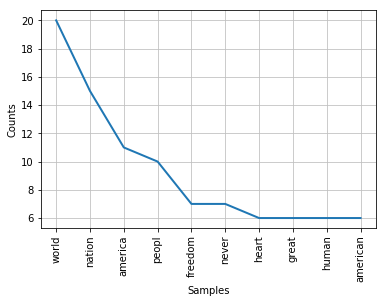

Histogram of word frequencies


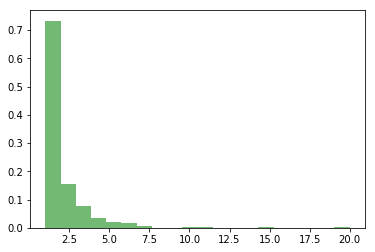

Log-Histogram of word frequencies


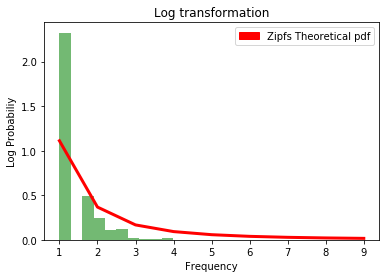

#######################
Distributions of the 1946-Truman.txt Speech.
#######################
The most common words are: 
('dollar', 210)
('million', 146)
('govern', 144)
('nation', 133)
('program', 131)
('fiscal', 127)
('expenditur', 119)
('state', 97)
('increas', 90)
('estim', 88)


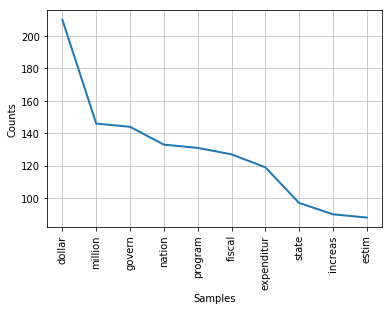

Histogram of word frequencies


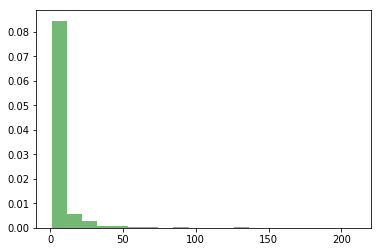

Log-Histogram of word frequencies


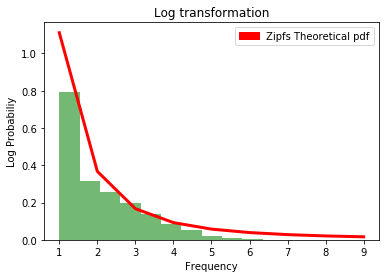

#######################
Distributions of the 1947-Truman.txt Speech.
#######################
The most common words are: 
('nation', 48)
('congress', 28)
('labor', 25)
('world', 21)
('program', 21)
('recommend', 18)
('govern', 18)
('industri', 18)
('peopl', 17)
('legisl', 17)


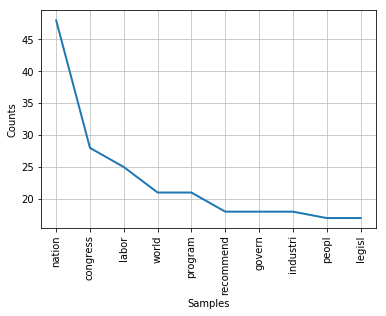

Histogram of word frequencies


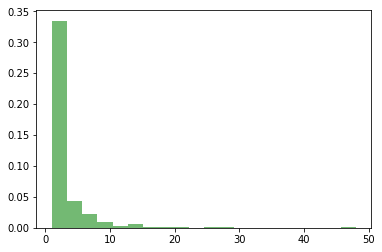

Log-Histogram of word frequencies


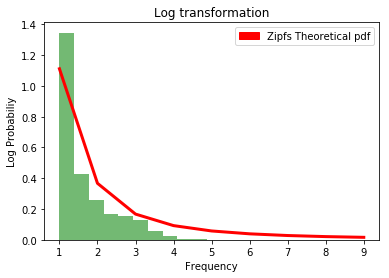

#######################
Distributions of the 1948-Truman.txt Speech.
#######################
The most common words are: 
('nation', 40)
('world', 31)
('peopl', 24)
('econom', 24)
('state', 21)
('great', 18)
('govern', 16)
('program', 16)
('price', 16)
('congress', 15)


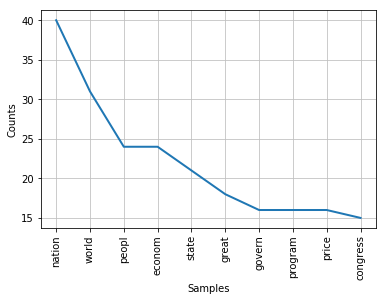

Histogram of word frequencies


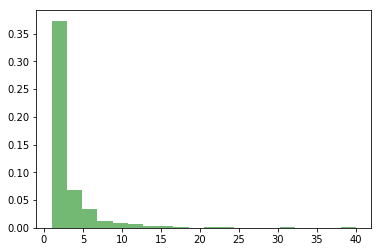

Log-Histogram of word frequencies


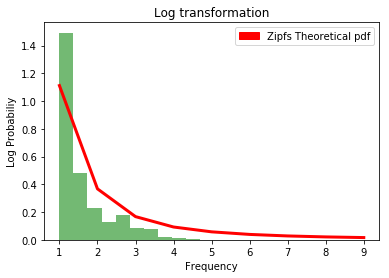

#######################
Distributions of the 1949-Truman.txt Speech.
#######################
The most common words are: 
('govern', 24)
('nation', 20)
('congress', 18)
('peopl', 18)
('world', 14)
('prosper', 14)
('product', 13)
('price', 13)
('power', 11)
('great', 10)


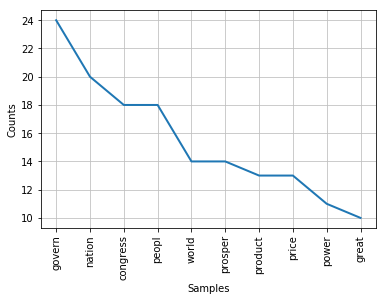

Histogram of word frequencies


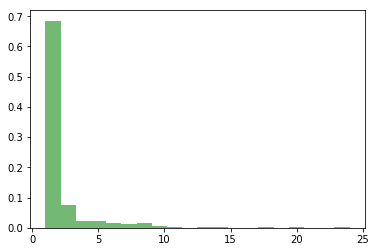

Log-Histogram of word frequencies


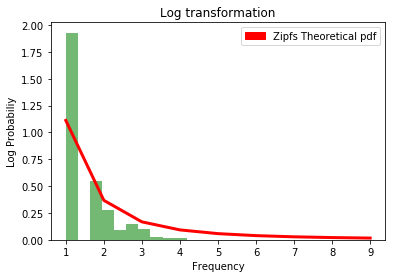

#######################
Distributions of the 1950-Truman.txt Speech.
#######################
The most common words are: 
('nation', 37)
('world', 27)
('increas', 25)
('peopl', 22)
('congress', 21)
('econom', 19)
('govern', 18)
('program', 18)
('achiev', 18)
('continu', 17)


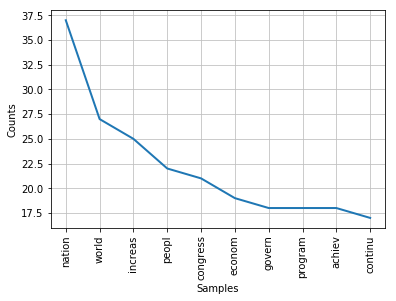

Histogram of word frequencies


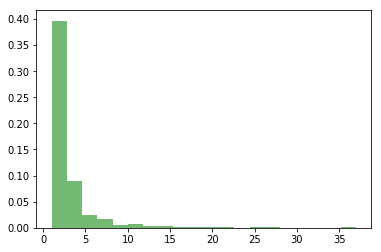

Log-Histogram of word frequencies


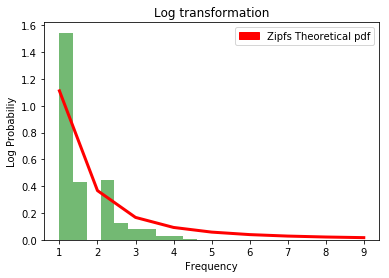

#######################
Distributions of the 1951-Truman.txt Speech.
#######################
The most common words are: 
('nation', 36)
('world', 31)
('countri', 21)
('soviet', 19)
('defens', 18)
('militari', 16)
('peopl', 15)
('strength', 15)
('freedom', 14)
('build', 14)


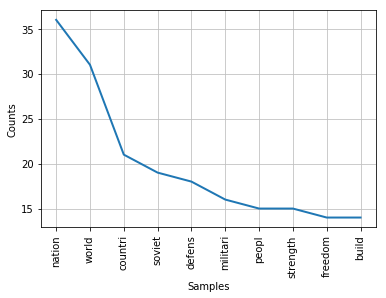

Histogram of word frequencies


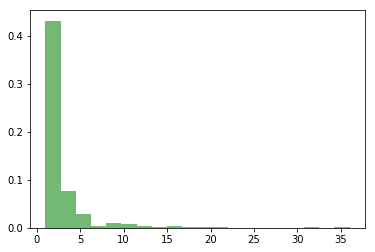

Log-Histogram of word frequencies


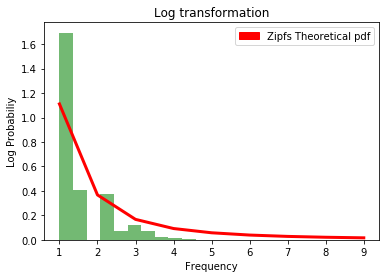

#######################
Distributions of the 1953-Eisenhower.txt Speech.
#######################
The most common words are: 
('nation', 43)
('govern', 35)
('polici', 25)
('labor', 22)
('econom', 22)
('secur', 21)
('program', 21)
('defens', 21)
('feder', 21)
('peopl', 20)


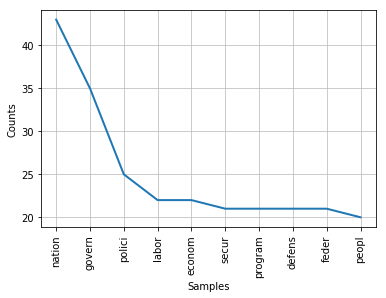

Histogram of word frequencies


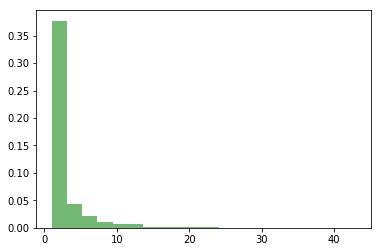

Log-Histogram of word frequencies


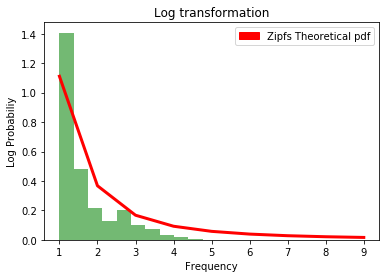

#######################
Distributions of the 1954-Eisenhower.txt Speech.
#######################
The most common words are: 
('govern', 43)
('program', 33)
('state', 28)
('nation', 27)
('continu', 27)
('shall', 26)
('congress', 25)
('feder', 23)
('recommend', 21)
('econom', 20)


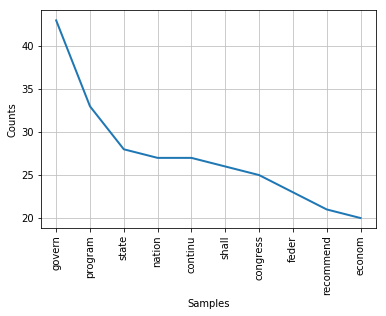

Histogram of word frequencies


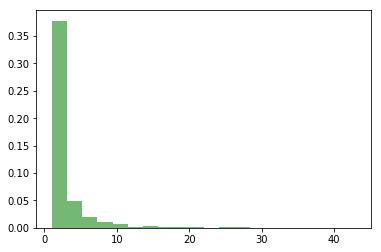

Log-Histogram of word frequencies


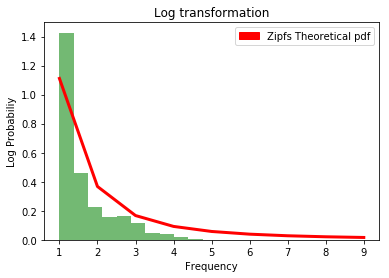

#######################
Distributions of the 1955-Eisenhower.txt Speech.
#######################
The most common words are: 
('nation', 48)
('program', 43)
('feder', 39)
('govern', 38)
('peopl', 31)
('shall', 29)
('militari', 28)
('congress', 25)
('econom', 25)
('develop', 24)


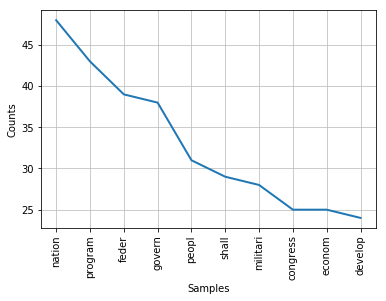

Histogram of word frequencies


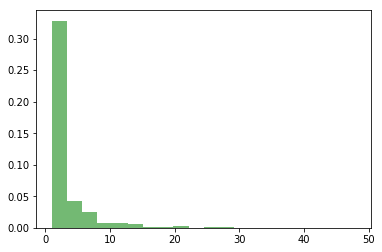

Log-Histogram of word frequencies


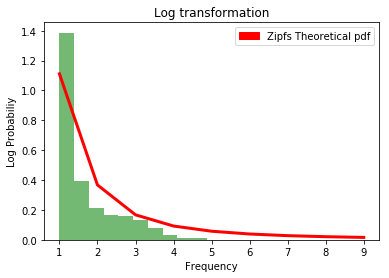

#######################
Distributions of the 1956-Eisenhower.txt Speech.
#######################
The most common words are: 
('nation', 52)
('program', 50)
('peopl', 31)
('feder', 30)
('congress', 29)
('govern', 29)
('legisl', 29)
('continu', 27)
('recommend', 26)
('improv', 26)


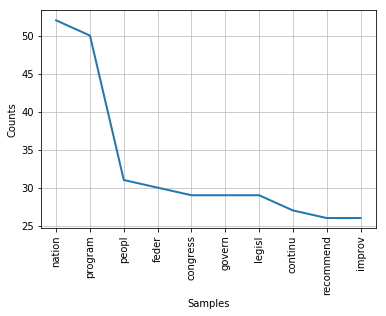

Histogram of word frequencies


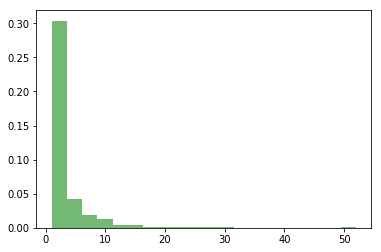

Log-Histogram of word frequencies


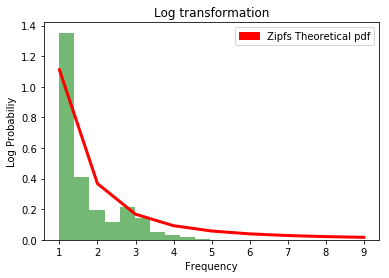

#######################
Distributions of the 1957-Eisenhower.txt Speech.
#######################
The most common words are: 
('nation', 37)
('world', 23)
('secur', 19)
('congress', 18)
('govern', 17)
('peopl', 17)
('state', 14)
('economi', 14)
('human', 12)
('prosper', 11)


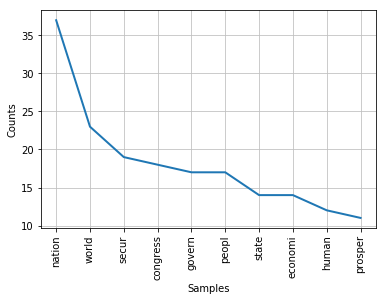

Histogram of word frequencies


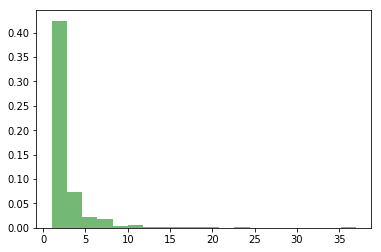

Log-Histogram of word frequencies


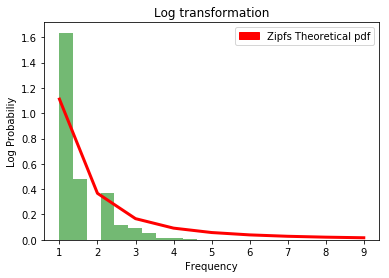

#######################
Distributions of the 1958-Eisenhower.txt Speech.
#######################
The most common words are: 
('world', 30)
('militari', 27)
('nation', 26)
('defens', 22)
('peopl', 21)
('strength', 20)
('secur', 20)
('econom', 19)
('effort', 19)
('action', 17)


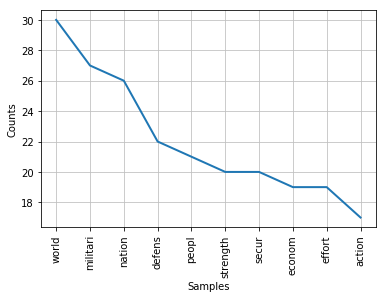

Histogram of word frequencies


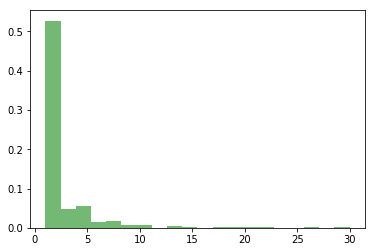

Log-Histogram of word frequencies


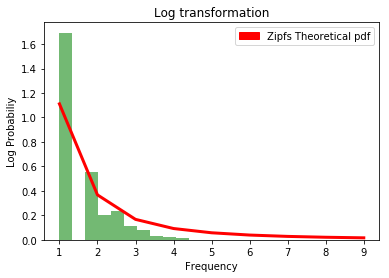

#######################
Distributions of the 1959-Eisenhower.txt Speech.
#######################
The most common words are: 
('nation', 34)
('world', 26)
('freedom', 18)
('peopl', 17)
('would', 17)
('congress', 16)
('govern', 15)
('feder', 15)
('america', 13)
('secur', 13)


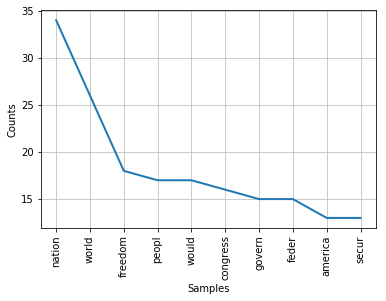

Histogram of word frequencies


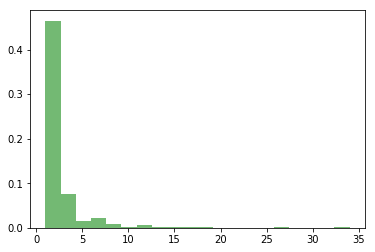

Log-Histogram of word frequencies


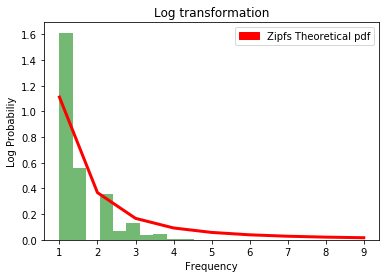

#######################
Distributions of the 1960-Eisenhower.txt Speech.
#######################
The most common words are: 
('nation', 53)
('world', 35)
('state', 20)
('peopl', 18)
('freedom', 18)
('develop', 15)
('american', 14)
('progress', 14)
('everi', 14)
('congress', 12)


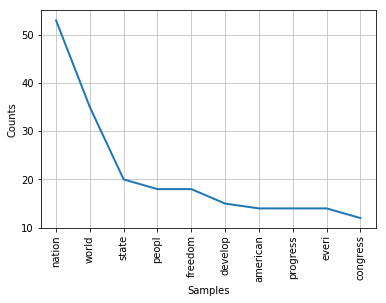

Histogram of word frequencies


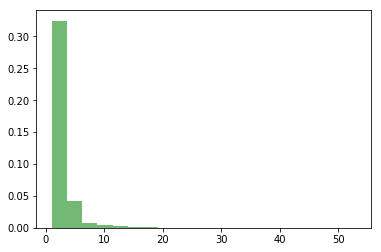

Log-Histogram of word frequencies


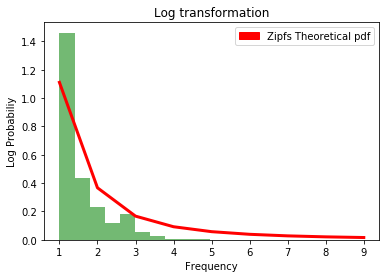

#######################
Distributions of the 1961-Kennedy.txt Speech.
#######################
The most common words are: 
('nation', 36)
('congress', 24)
('freedom', 22)
('defens', 21)
('program', 20)
('space', 20)
('dollar', 18)
('increas', 17)
('militari', 16)
('effort', 16)


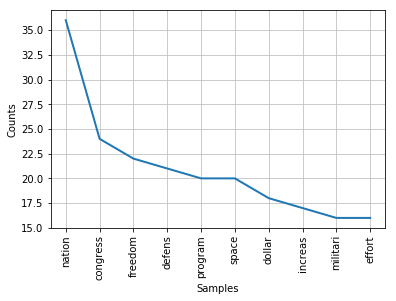

Histogram of word frequencies


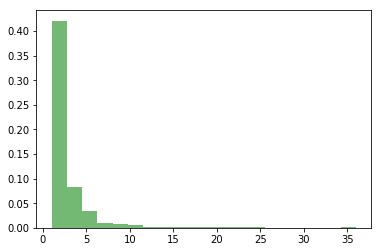

Log-Histogram of word frequencies


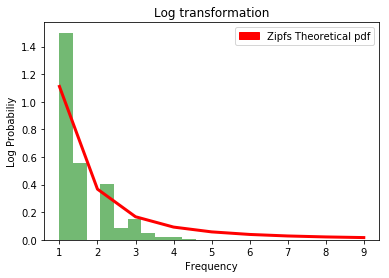

#######################
Distributions of the 1962-Kennedy.txt Speech.
#######################
The most common words are: 
('nation', 43)
('world', 22)
('congress', 19)
('state', 19)
('effort', 18)
('increas', 18)
('program', 16)
('strength', 16)
('america', 15)
('american', 13)


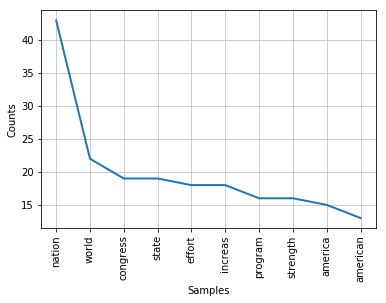

Histogram of word frequencies


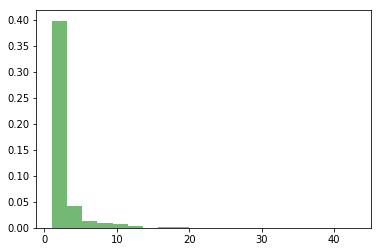

Log-Histogram of word frequencies


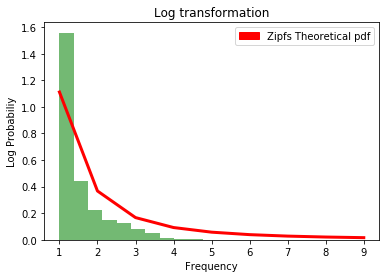

#######################
Distributions of the 1963-Johnson.txt Speech.
#######################
The most common words are: 
('nation', 16)
('action', 10)
('strong', 9)
('dream', 9)
('american', 8)
('kennedi', 7)
('strength', 7)
('govern', 7)
('america', 6)
('presid', 5)


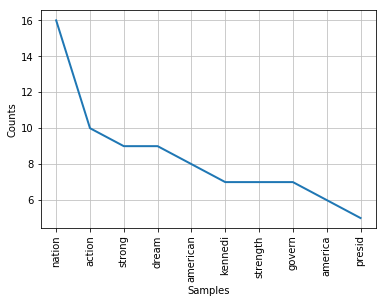

Histogram of word frequencies


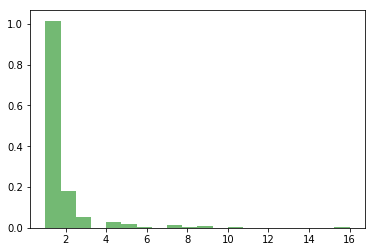

Log-Histogram of word frequencies


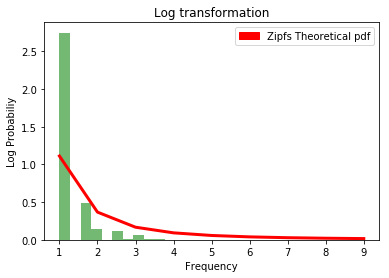

#######################
Distributions of the 1963-Kennedy.txt Speech.
#######################
The most common words are: 
('nation', 41)
('world', 25)
('defens', 18)
('american', 17)
('peopl', 14)
('billion', 14)
('allianc', 14)
('state', 13)
('would', 13)
('program', 13)


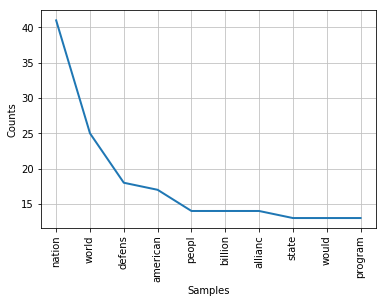

Histogram of word frequencies


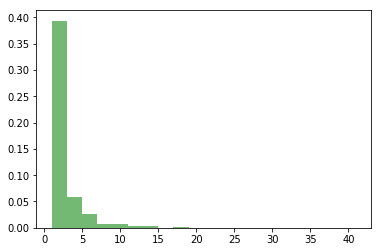

Log-Histogram of word frequencies


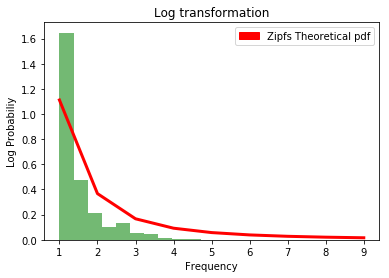

#######################
Distributions of the 1964-Johnson.txt Speech.
#######################
The most common words are: 
('everi', 18)
('nation', 17)
('american', 15)
('session', 13)
('public', 11)
('congress', 10)
('program', 10)
('million', 10)
('poverti', 9)
('countri', 9)


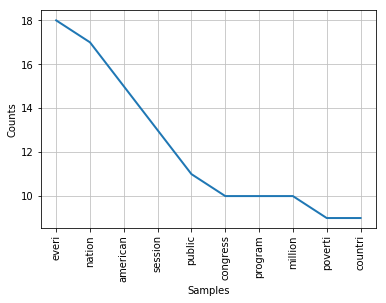

Histogram of word frequencies


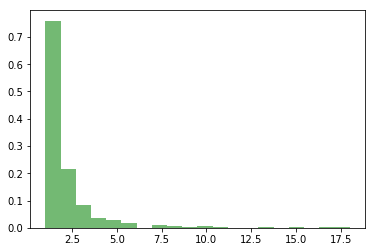

Log-Histogram of word frequencies


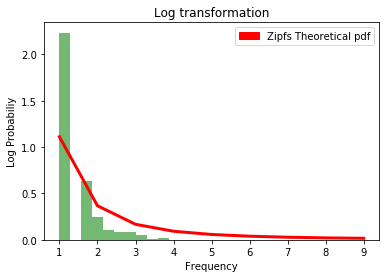

#######################
Distributions of the 1965-Johnson-1.txt Speech.
#######################
The most common words are: 
('nation', 39)
('american', 25)
('world', 19)
('peopl', 16)
('propos', 15)
('first', 14)
('continu', 14)
('america', 14)
('program', 14)
('presid', 12)


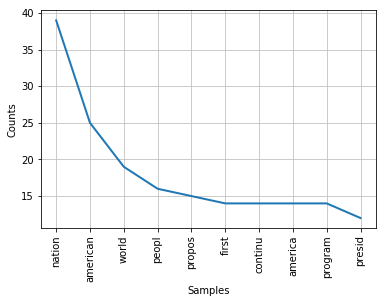

Histogram of word frequencies


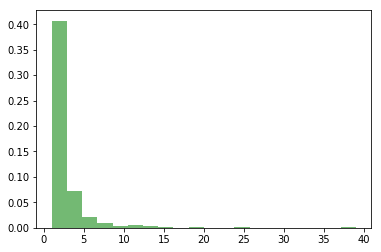

Log-Histogram of word frequencies


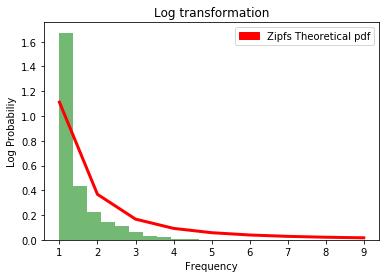

#######################
Distributions of the 1965-Johnson-2.txt Speech.
#######################
The most common words are: 
('right', 49)
('american', 27)
('everi', 19)
('tonight', 15)
('peopl', 14)
('nation', 14)
('presid', 13)
('countri', 11)
('great', 11)
('negro', 11)


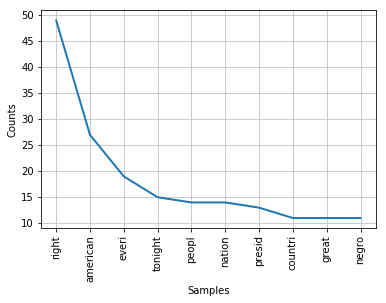

Histogram of word frequencies


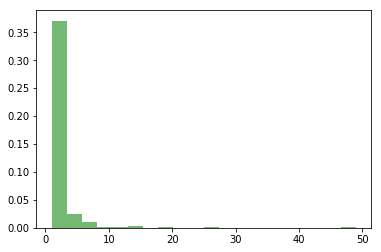

Log-Histogram of word frequencies


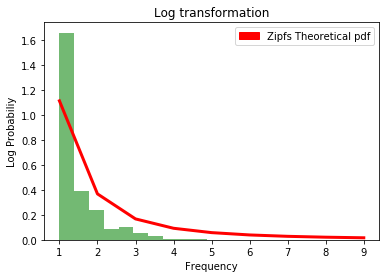

#######################
Distributions of the 1966-Johnson.txt Speech.
#######################
The most common words are: 
('peopl', 36)
('nation', 34)
('vietnam', 32)
('tonight', 26)
('american', 18)
('world', 18)
('state', 17)
('increas', 17)
('great', 16)
('govern', 15)


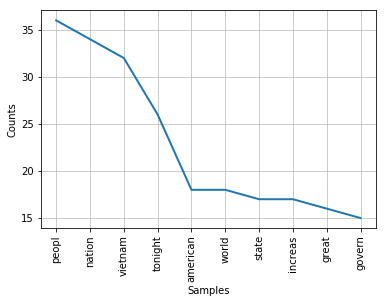

Histogram of word frequencies


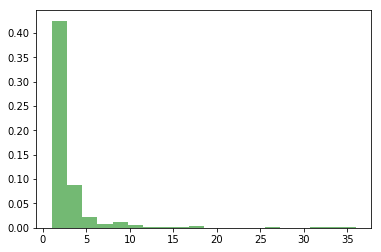

Log-Histogram of word frequencies


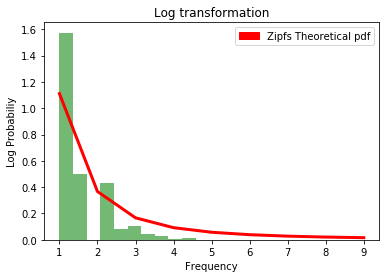

#######################
Distributions of the 1967-Johnson.txt Speech.
#######################
The most common words are: 
('nation', 41)
('congress', 32)
('american', 32)
('peopl', 30)
('vietnam', 21)
('great', 20)
('percent', 19)
('state', 18)
('recommend', 18)
('govern', 18)


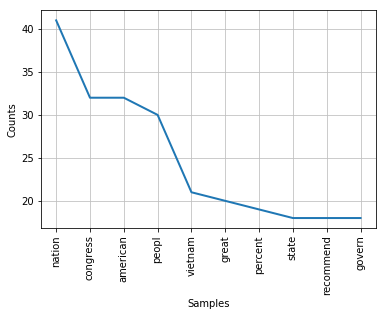

Histogram of word frequencies


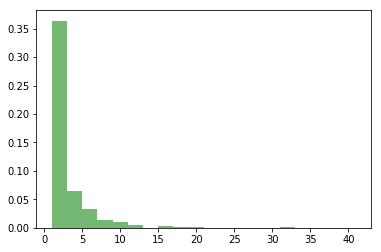

Log-Histogram of word frequencies


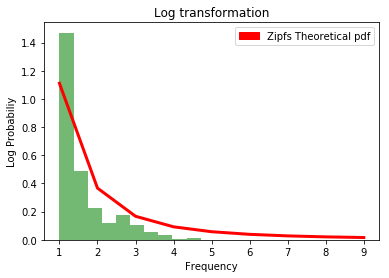

#######################
Distributions of the 1968-Johnson.txt Speech.
#######################
The most common words are: 
('congress', 33)
('billion', 27)
('nation', 26)
('american', 25)
('increas', 19)
('peopl', 18)
('america', 17)
('program', 17)
('million', 15)
('shall', 14)


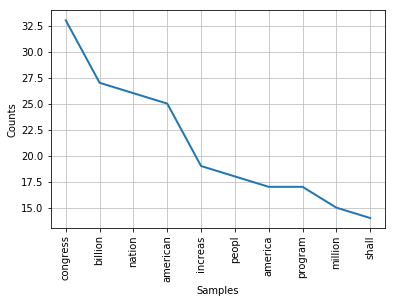

Histogram of word frequencies


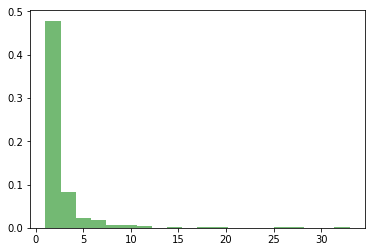

Log-Histogram of word frequencies


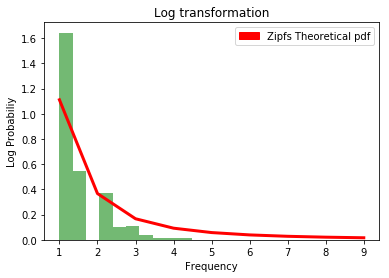

#######################
Distributions of the 1969-Johnson.txt Speech.
#######################
The most common words are: 
('congress', 32)
('nation', 21)
('think', 19)
('believ', 17)
('presid', 16)
('american', 16)
('world', 14)
('tonight', 13)
('commit', 13)
('state', 11)


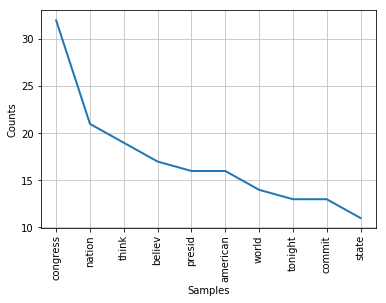

Histogram of word frequencies


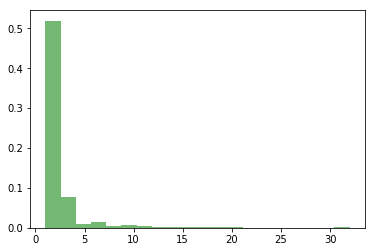

Log-Histogram of word frequencies


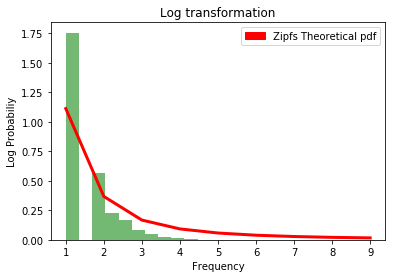

#######################
Distributions of the 1970-Nixon.txt Speech.
#######################
The most common words are: 
('america', 27)
('nation', 25)
('peopl', 24)
('american', 22)
('world', 21)
('congress', 19)
('program', 19)
('govern', 14)
('shall', 13)
('state', 12)


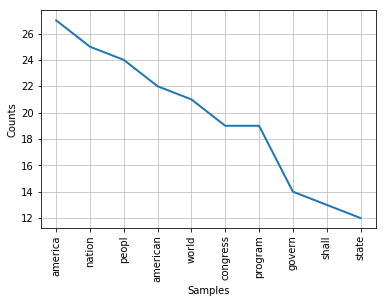

Histogram of word frequencies


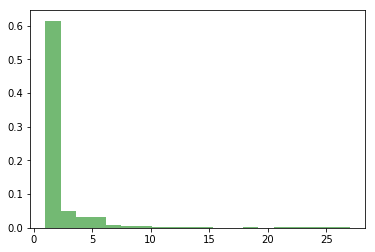

Log-Histogram of word frequencies


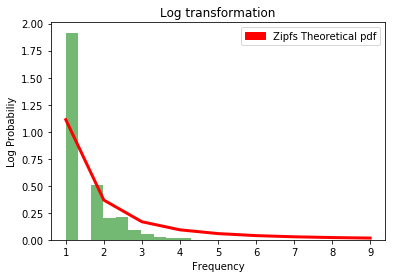

#######################
Distributions of the 1971-Nixon.txt Speech.
#######################
The most common words are: 
('govern', 45)
('congress', 36)
('peopl', 32)
('state', 24)
('american', 22)
('great', 22)
('nation', 22)
('america', 19)
('feder', 17)
('local', 14)


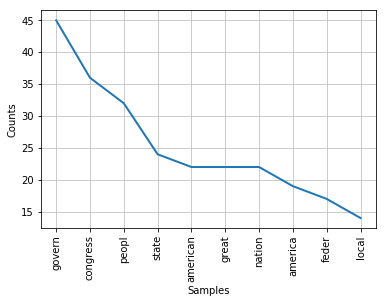

Histogram of word frequencies


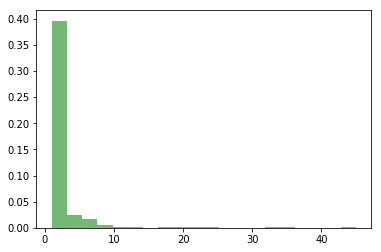

Log-Histogram of word frequencies


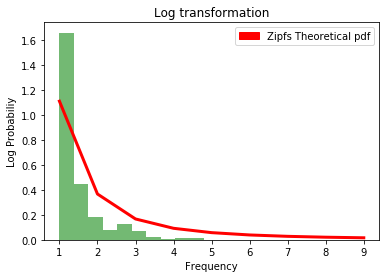

#######################
Distributions of the 1972-Nixon.txt Speech.
#######################
The most common words are: 
('nation', 28)
('congress', 24)
('america', 19)
('american', 16)
('world', 16)
('great', 14)
('becaus', 13)
('program', 11)
('propos', 11)
('presid', 9)


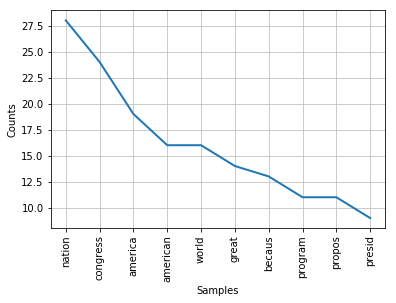

Histogram of word frequencies


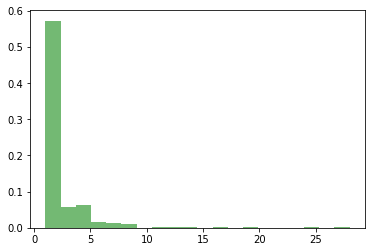

Log-Histogram of word frequencies


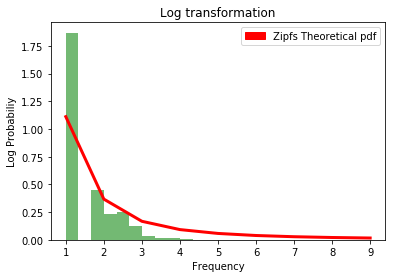

#######################
Distributions of the 1973-Nixon.txt Speech.
#######################
The most common words are: 
('govern', 13)
('american', 13)
('state', 12)
('messag', 12)
('congress', 10)
('peopl', 9)
('union', 8)
('better', 8)
('resourc', 7)
('program', 6)


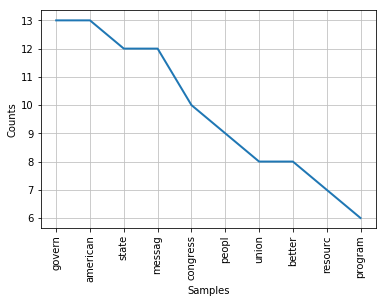

Histogram of word frequencies


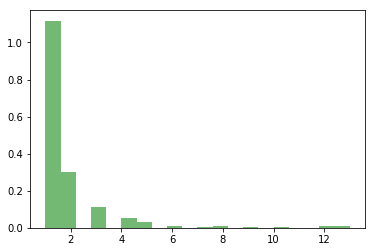

Log-Histogram of word frequencies


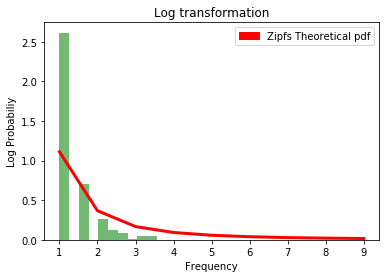

#######################
Distributions of the 1974-Nixon.txt Speech.
#######################
The most common words are: 
('american', 32)
('america', 27)
('state', 24)
('congress', 21)
('nation', 20)
('peopl', 20)
('world', 19)
('energi', 18)
('presid', 17)
('great', 16)


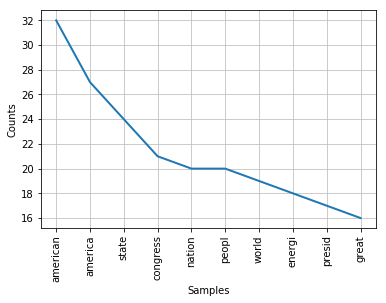

Histogram of word frequencies


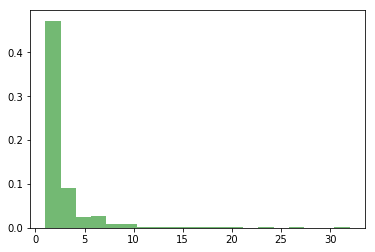

Log-Histogram of word frequencies


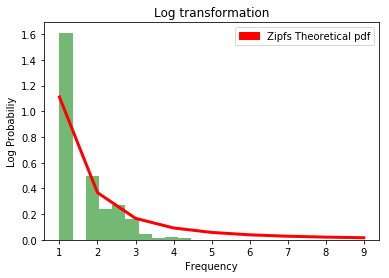

#######################
Distributions of the 1975-Ford.txt Speech.
#######################
The most common words are: 
('world', 25)
('energi', 25)
('nation', 24)
('program', 24)
('congress', 22)
('increas', 19)
('state', 18)
('feder', 17)
('peopl', 14)
('presid', 13)


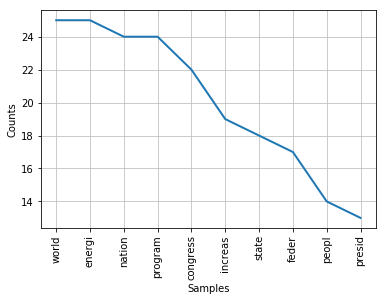

Histogram of word frequencies


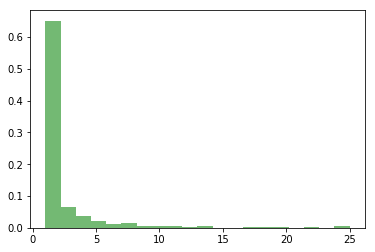

Log-Histogram of word frequencies


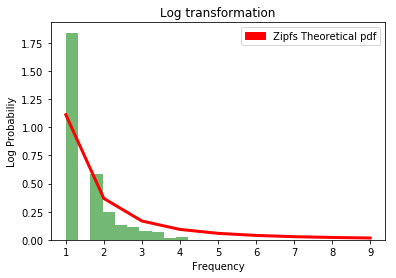

#######################
Distributions of the 1976-Ford.txt Speech.
#######################
The most common words are: 
('feder', 36)
('american', 32)
('govern', 26)
('state', 24)
('america', 21)
('program', 19)
('peopl', 18)
('world', 17)
('congress', 15)
('propos', 15)


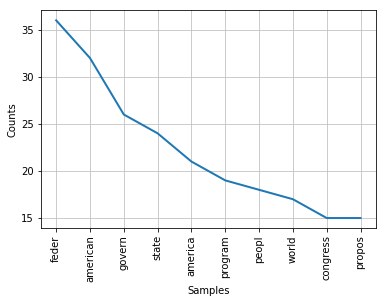

Histogram of word frequencies


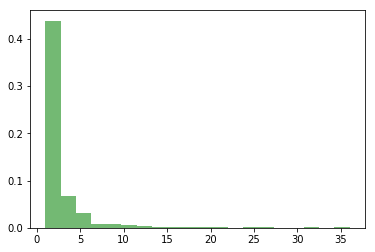

Log-Histogram of word frequencies


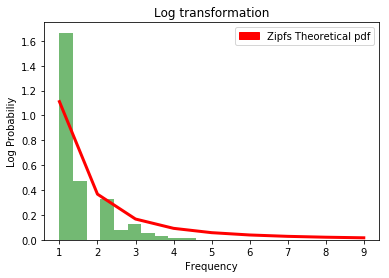

#######################
Distributions of the 1977-Ford.txt Speech.
#######################
The most common words are: 
('nation', 26)
('presid', 25)
('congress', 22)
('state', 21)
('energi', 21)
('govern', 20)
('peopl', 20)
('union', 17)
('american', 17)
('world', 15)


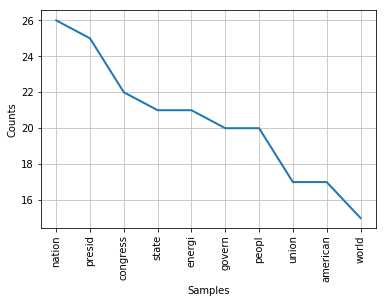

Histogram of word frequencies


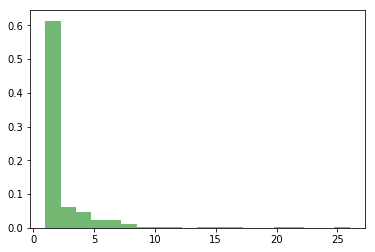

Log-Histogram of word frequencies


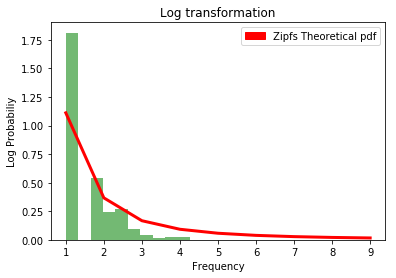

#######################
Distributions of the 1978-Carter.txt Speech.
#######################
The most common words are: 
('peopl', 26)
('world', 24)
('govern', 24)
('nation', 23)
('american', 23)
('inflat', 17)
('econom', 15)
('polici', 14)
('secur', 13)
('energi', 12)


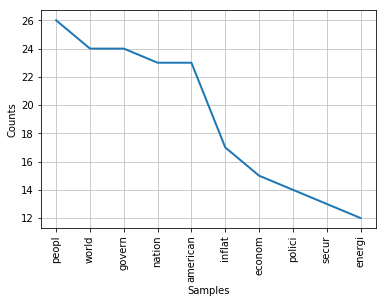

Histogram of word frequencies


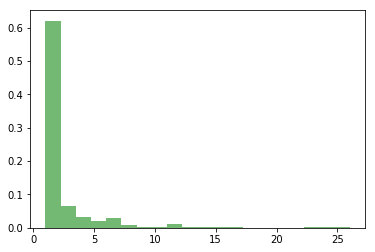

Log-Histogram of word frequencies


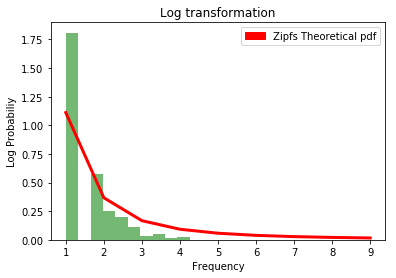

#######################
Distributions of the 1979-Carter.txt Speech.
#######################
The most common words are: 
('world', 31)
('american', 30)
('nation', 29)
('govern', 17)
('peopl', 16)
('build', 15)
('foundat', 13)
('nuclear', 13)
('inflat', 12)
('congress', 11)


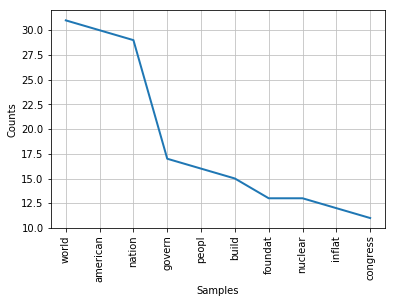

Histogram of word frequencies


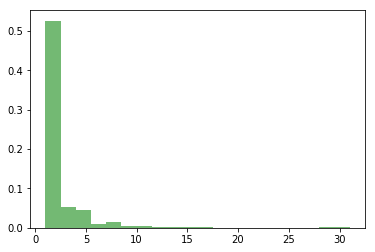

Log-Histogram of word frequencies


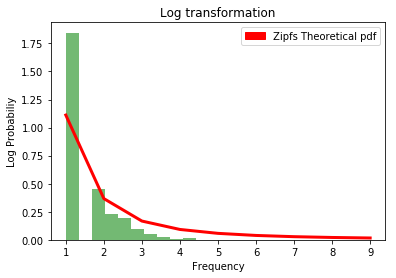

#######################
Distributions of the 1980-Carter.txt Speech.
#######################
The most common words are: 
('nation', 33)
('soviet', 32)
('world', 27)
('america', 22)
('state', 18)
('union', 18)
('secur', 18)
('peopl', 13)
('militari', 13)
('continu', 13)


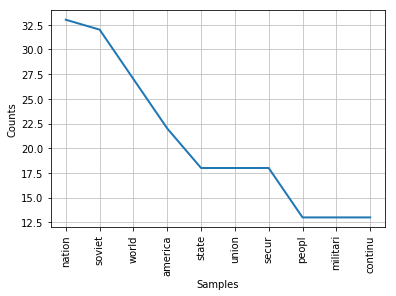

Histogram of word frequencies


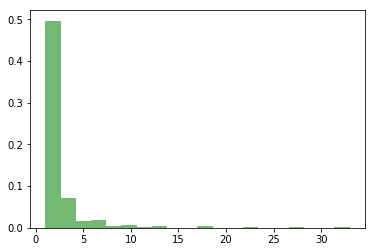

Log-Histogram of word frequencies


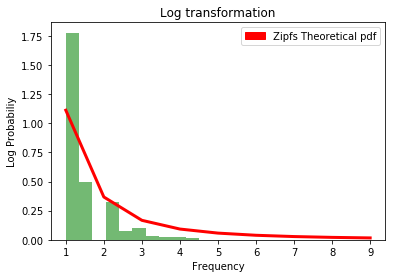

#######################
Distributions of the 1981-Reagan.txt Speech.
#######################
The most common words are: 
('program', 46)
('billion', 25)
('govern', 25)
('feder', 19)
('reduc', 17)
('econom', 16)
('million', 15)
('increas', 15)
('inflat', 13)
('percent', 12)


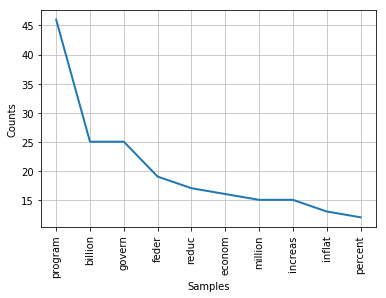

Histogram of word frequencies


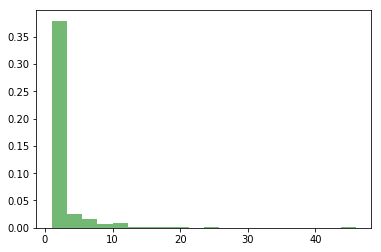

Log-Histogram of word frequencies


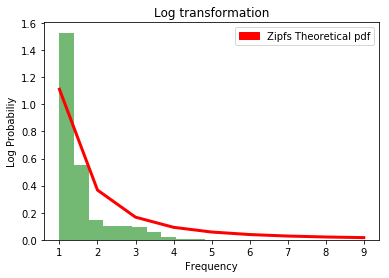

#######################
Distributions of the 1982-Reagan.txt Speech.
#######################
The most common words are: 
('program', 42)
('govern', 33)
('american', 26)
('feder', 24)
('state', 21)
('america', 20)
('nation', 18)
('peopl', 18)
('togeth', 15)
('increas', 15)


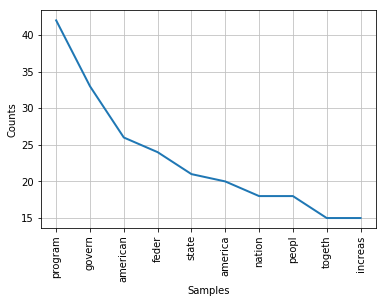

Histogram of word frequencies


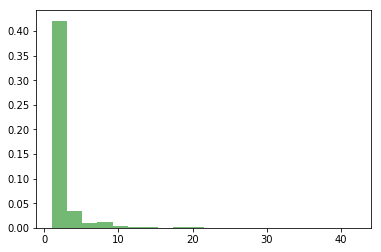

Log-Histogram of word frequencies


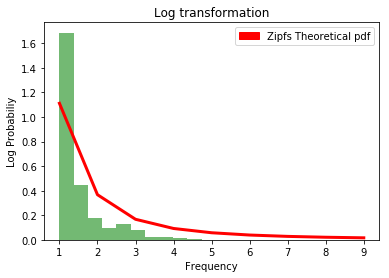

#######################
Distributions of the 1983-Reagan.txt Speech.
#######################
The most common words are: 
('american', 34)
('america', 25)
('peopl', 20)
('govern', 20)
('econom', 18)
('nation', 17)
('problem', 17)
('spend', 17)
('program', 15)
('world', 14)


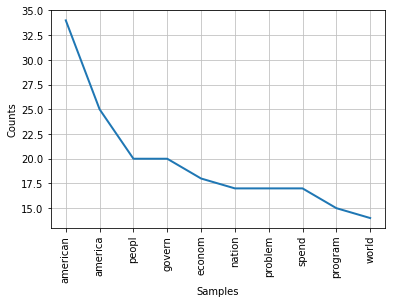

Histogram of word frequencies


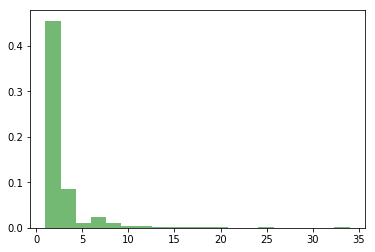

Log-Histogram of word frequencies


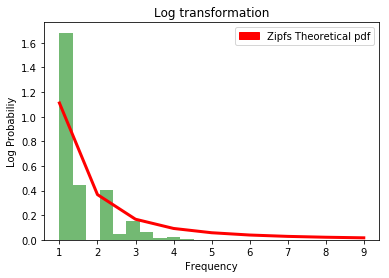

#######################
Distributions of the 1984-Reagan.txt Speech.
#######################
The most common words are: 
('america', 31)
('peopl', 27)
('govern', 19)
('could', 18)
('american', 16)
('famili', 14)
('freedom', 13)
('spend', 13)
('great', 12)
('space', 12)


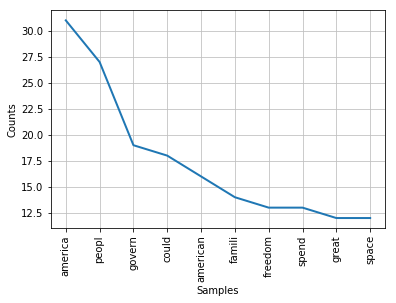

Histogram of word frequencies


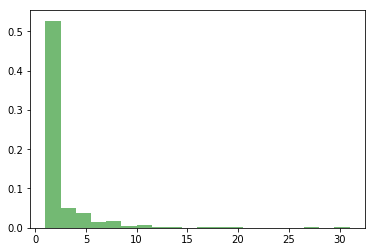

Log-Histogram of word frequencies


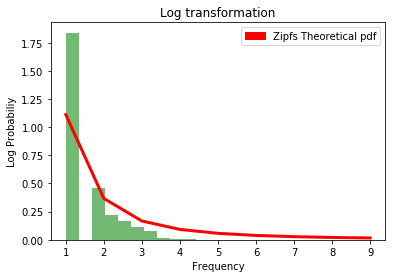

#######################
Distributions of the 1985-Reagan.txt Speech.
#######################
The most common words are: 
('freedom', 20)
('american', 19)
('govern', 16)
('economi', 15)
('growth', 14)
('world', 13)
('peopl', 12)
('great', 12)
('reduc', 12)
('defens', 12)


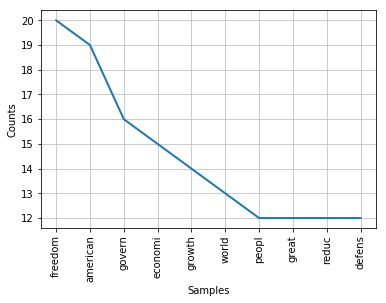

Histogram of word frequencies


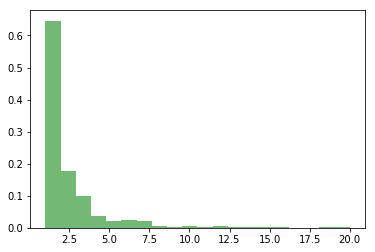

Log-Histogram of word frequencies


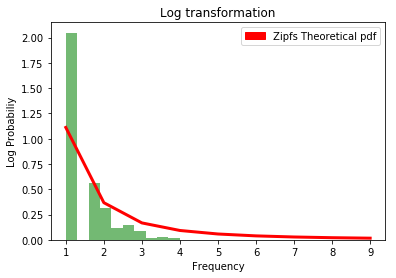

#######################
Distributions of the 1986-Reagan.txt Speech.
#######################
The most common words are: 
('america', 30)
('nation', 19)
('famili', 18)
('american', 15)
('futur', 15)
('peopl', 14)
('tonight', 12)
('dream', 12)
('govern', 11)
('world', 11)


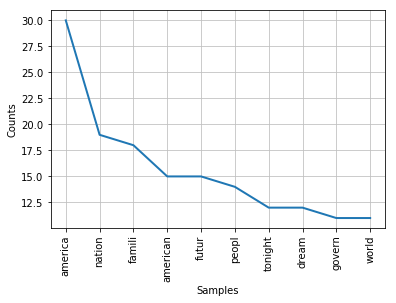

Histogram of word frequencies


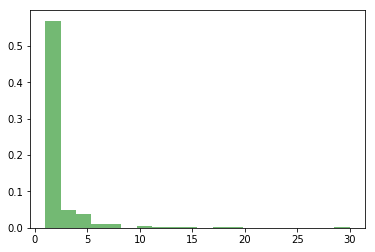

Log-Histogram of word frequencies


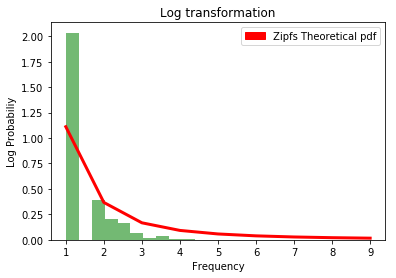

#######################
Distributions of the 1987-Reagan.txt Speech.
#######################
The most common words are: 
('america', 26)
('congress', 24)
('peopl', 24)
('american', 17)
('nation', 15)
('freedom', 14)
('world', 14)
('constitut', 13)
('becaus', 13)
('never', 12)


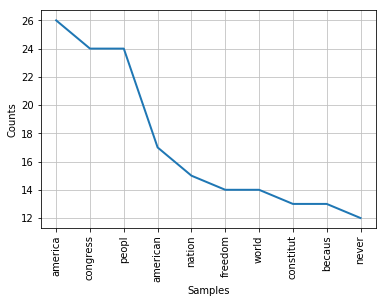

Histogram of word frequencies


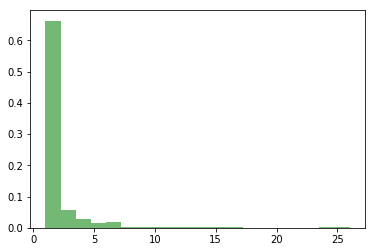

Log-Histogram of word frequencies


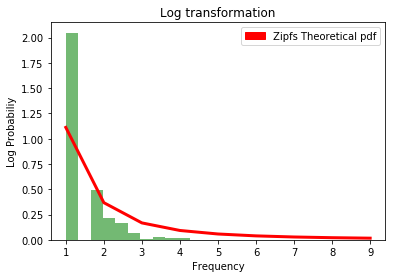

#######################
Distributions of the 1988-Reagan.txt Speech.
#######################
The most common words are: 
('america', 31)
('american', 24)
('freedom', 21)
('govern', 20)
('famili', 20)
('nation', 18)
('world', 18)
('peopl', 17)
('budget', 17)
('spend', 15)


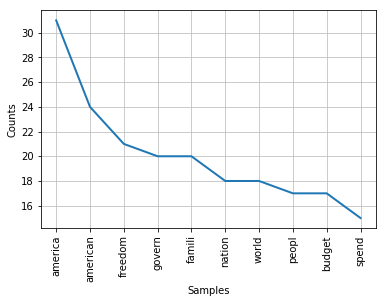

Histogram of word frequencies


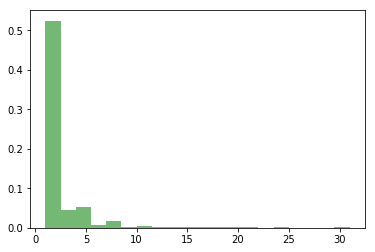

Log-Histogram of word frequencies


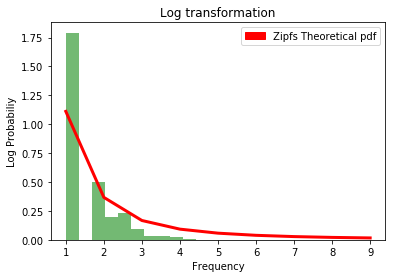

#######################
Distributions of the 1989-Bush.txt Speech.
#######################
The most common words are: 
('america', 32)
('nation', 22)
('tonight', 21)
('budget', 20)
('propos', 17)
('american', 16)
('futur', 15)
('peopl', 13)
('presid', 12)
('congress', 11)


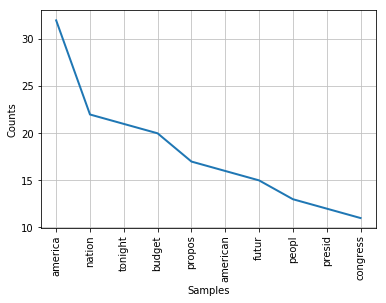

Histogram of word frequencies


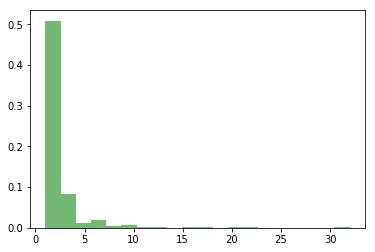

Log-Histogram of word frequencies


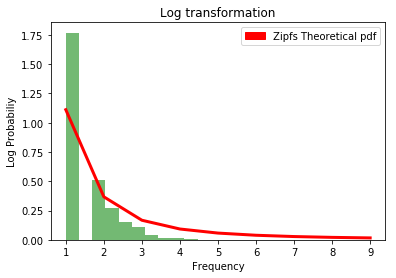

#######################
Distributions of the 1990-Bush.txt Speech.
#######################
The most common words are: 
('america', 25)
('world', 24)
('everi', 23)
('american', 23)
('nation', 16)
('state', 13)
('today', 13)
('chang', 12)
('futur', 12)
('tonight', 11)


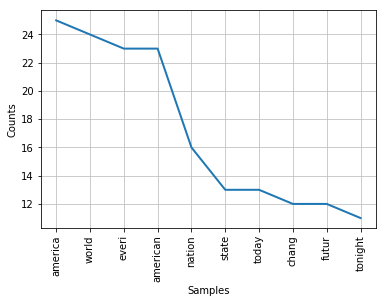

Histogram of word frequencies


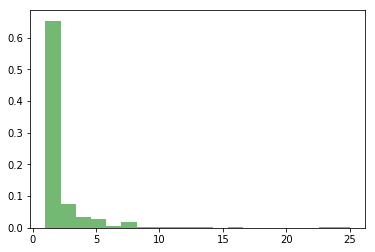

Log-Histogram of word frequencies


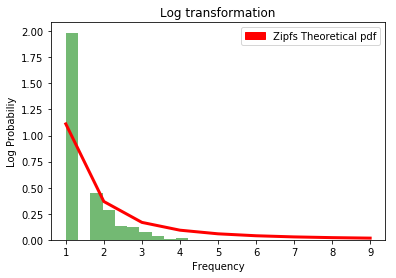

#######################
Distributions of the 1991-Bush-1.txt Speech.
#######################
The most common words are: 
('world', 30)
('american', 26)
('nation', 23)
('america', 21)
('peopl', 15)
('freedom', 15)
('state', 14)
('futur', 14)
('power', 13)
('commun', 12)


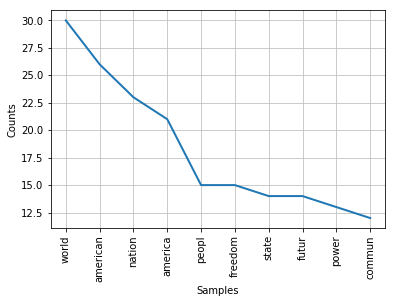

Histogram of word frequencies


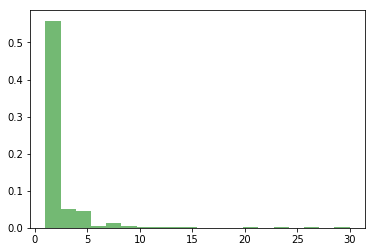

Log-Histogram of word frequencies


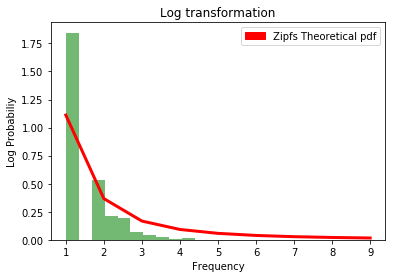

#######################
Distributions of the 1991-Bush-2.txt Speech.
#######################
The most common words are: 
('world', 23)
('american', 19)
('nation', 18)
('peopl', 13)
('tonight', 11)
('secur', 10)
('congress', 9)
('state', 9)
('right', 9)
('america', 9)


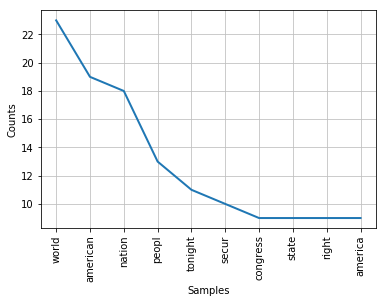

Histogram of word frequencies


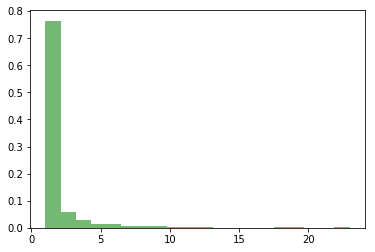

Log-Histogram of word frequencies


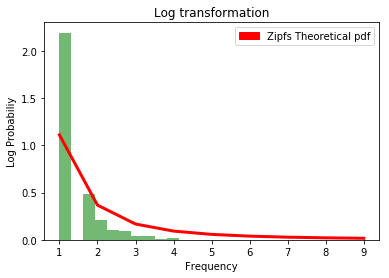

#######################
Distributions of the 1992-Bush.txt Speech.
#######################
The most common words are: 
('peopl', 27)
('world', 23)
('american', 23)
('right', 19)
('countri', 18)
('thing', 17)
('would', 16)
('congress', 15)
('chang', 15)
('america', 15)


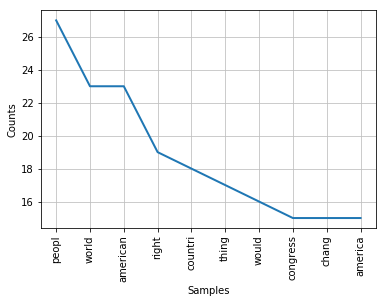

Histogram of word frequencies


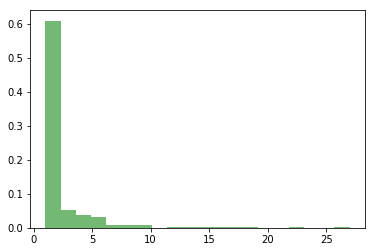

Log-Histogram of word frequencies


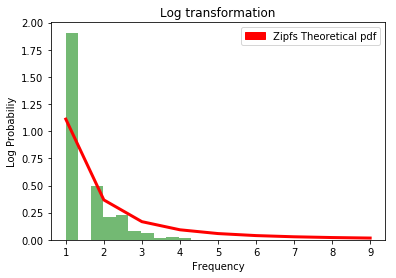

#######################
Distributions of the 1993-Clinton.txt Speech.
#######################
The most common words are: 
('peopl', 45)
('american', 42)
('invest', 29)
('countri', 26)
('govern', 25)
('nation', 22)
('deficit', 21)
('health', 21)
('program', 21)
('incom', 20)


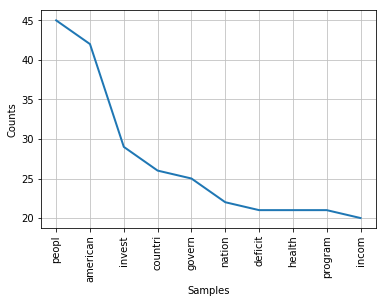

Histogram of word frequencies


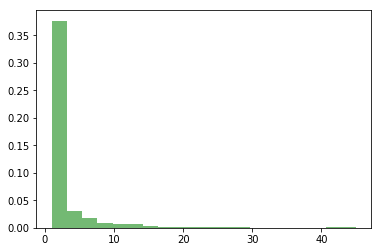

Log-Histogram of word frequencies


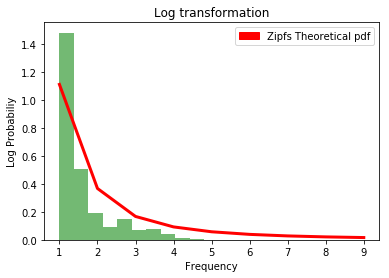

#######################
Distributions of the 1994-Clinton.txt Speech.
#######################
The most common words are: 
('peopl', 67)
('american', 42)
('health', 41)
('congress', 25)
('countri', 22)
('everi', 22)
('welfar', 21)
('world', 20)
('reform', 20)
('becaus', 20)


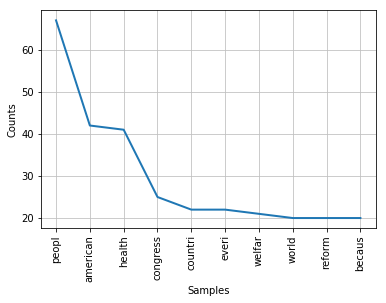

Histogram of word frequencies


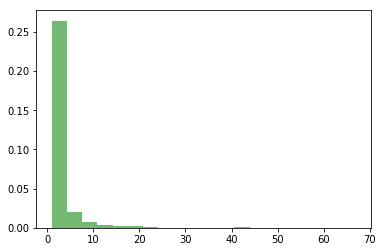

Log-Histogram of word frequencies


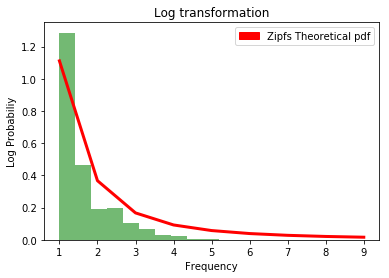

#######################
Distributions of the 1995-Clinton.txt Speech.
#######################
The most common words are: 
('peopl', 73)
('american', 40)
('govern', 39)
('countri', 34)
('thing', 25)
('america', 22)
('nation', 22)
('congress', 21)
('famili', 21)
('children', 19)


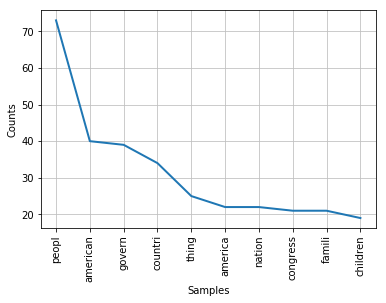

Histogram of word frequencies


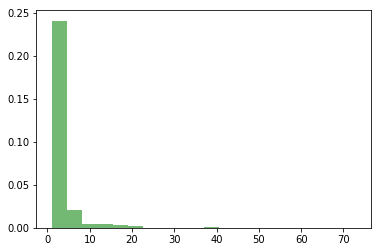

Log-Histogram of word frequencies


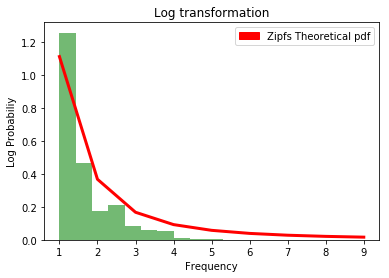

#######################
Distributions of the 1996-Clinton.txt Speech.
#######################
The most common words are: 
('challeng', 52)
('american', 49)
('peopl', 43)
('children', 37)
('america', 34)
('congress', 31)
('famili', 27)
('everi', 25)
('commun', 23)
('govern', 18)


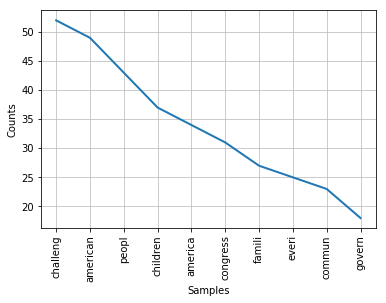

Histogram of word frequencies


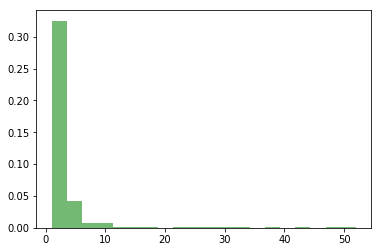

Log-Histogram of word frequencies


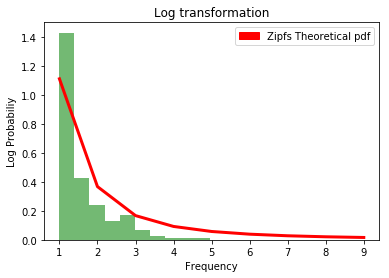

#######################
Distributions of the 1997-Clinton.txt Speech.
#######################
The most common words are: 
('america', 48)
('everi', 37)
('american', 36)
('nation', 34)
('peopl', 31)
('world', 30)
('school', 29)
('children', 24)
('challeng', 20)
('commun', 19)


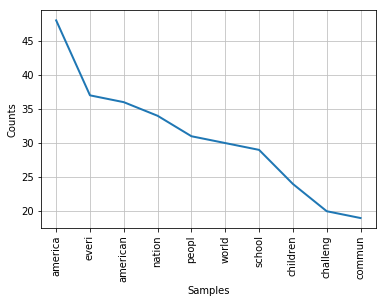

Histogram of word frequencies


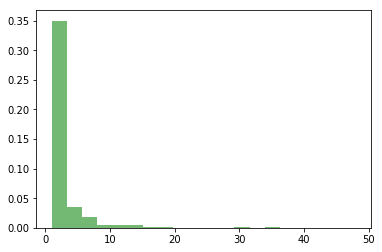

Log-Histogram of word frequencies


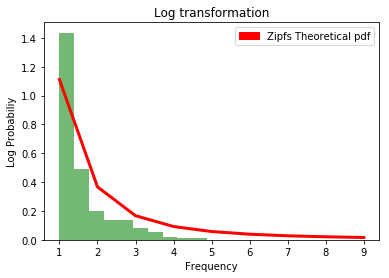

#######################
Distributions of the 1998-Clinton.txt Speech.
#######################
The most common words are: 
('america', 44)
('american', 38)
('nation', 33)
('everi', 29)
('congress', 26)
('children', 24)
('peopl', 22)
('first', 22)
('famili', 21)
('commun', 21)


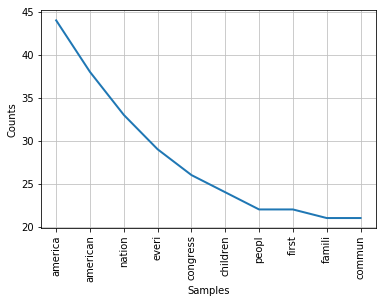

Histogram of word frequencies


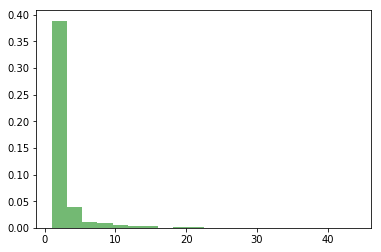

Log-Histogram of word frequencies


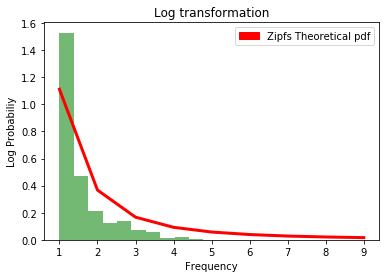

#######################
Distributions of the 1999-Clinton.txt Speech.
#######################
The most common words are: 
('american', 48)
('america', 37)
('centuri', 36)
('secur', 33)
('support', 31)
('school', 29)
('nation', 28)
('congress', 27)
('social', 26)
('everi', 26)


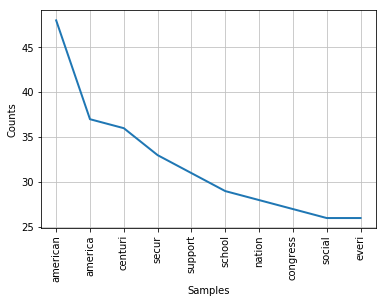

Histogram of word frequencies


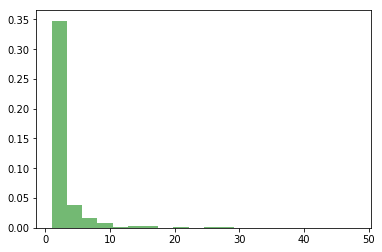

Log-Histogram of word frequencies


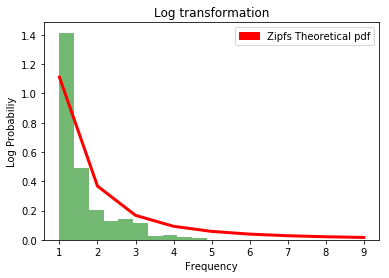

#######################
Distributions of the 2000-Clinton.txt Speech.
#######################
The most common words are: 
('american', 46)
('peopl', 41)
('children', 39)
('america', 33)
('thank', 33)
('nation', 30)
('everi', 29)
('tonight', 27)
('commun', 25)
('first', 24)


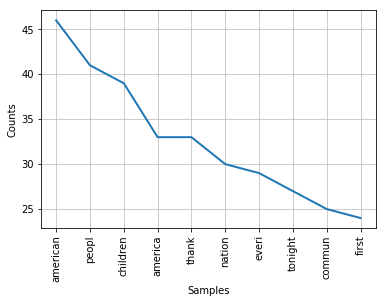

Histogram of word frequencies


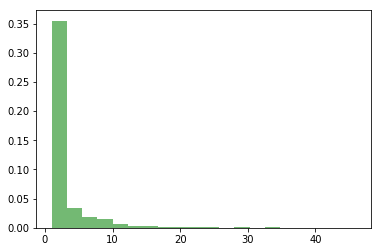

Log-Histogram of word frequencies


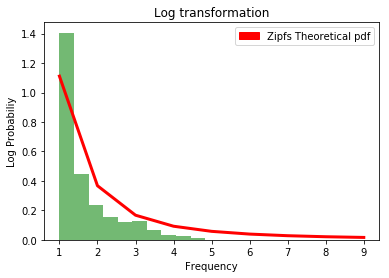

#######################
Distributions of the 2001-GWBush-1.txt Speech.
#######################
The most common words are: 
('budget', 26)
('nation', 24)
('america', 23)
('govern', 21)
('secur', 17)
('peopl', 15)
('social', 15)
('money', 15)
('spend', 14)
('increas', 13)


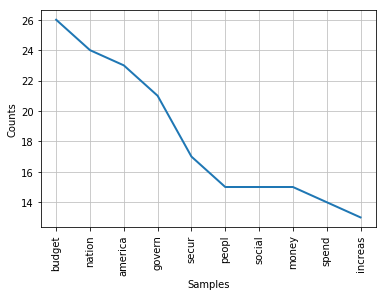

Histogram of word frequencies


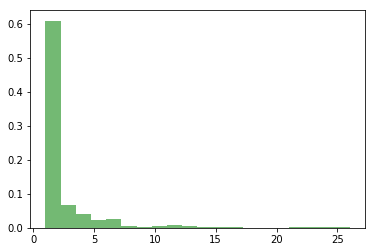

Log-Histogram of word frequencies


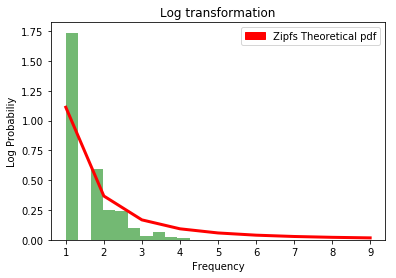

#######################
Distributions of the 2001-GWBush-2.txt Speech.
#######################
The most common words are: 
('american', 24)
('america', 22)
('terrorist', 18)
('world', 18)
('everi', 17)
('countri', 15)
('terror', 15)
('nation', 14)
('tonight', 13)
('freedom', 13)


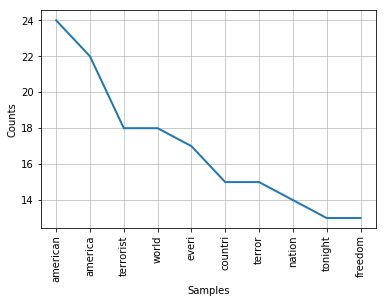

Histogram of word frequencies


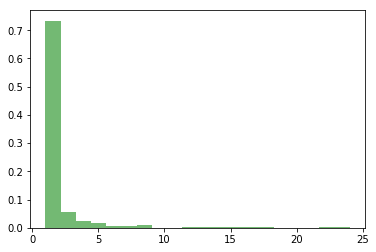

Log-Histogram of word frequencies


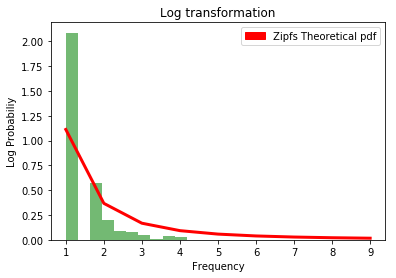

#######################
Distributions of the 2002-GWBush.txt Speech.
#######################
The most common words are: 
('america', 33)
('american', 23)
('secur', 20)
('world', 19)
('terrorist', 19)
('nation', 18)
('terror', 15)
('peopl', 14)
('freedom', 14)
('state', 13)


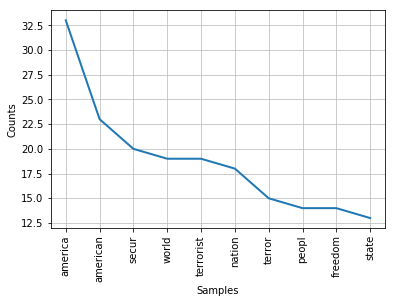

Histogram of word frequencies


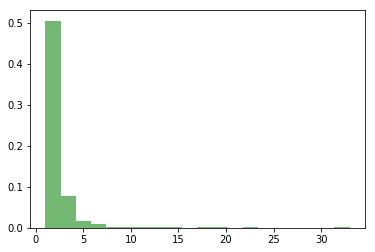

Log-Histogram of word frequencies


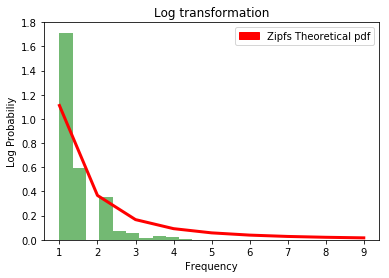

#######################
Distributions of the 2003-GWBush.txt Speech.
#######################
The most common words are: 
('peopl', 34)
('american', 33)
('weapon', 29)
('america', 26)
('nation', 26)
('world', 26)
('countri', 24)
('saddam', 19)
('hussein', 19)
('million', 16)


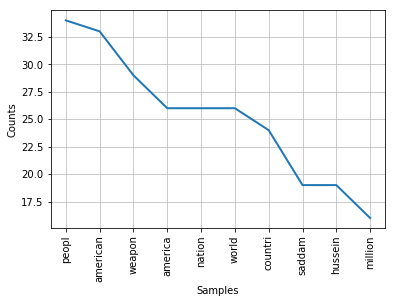

Histogram of word frequencies


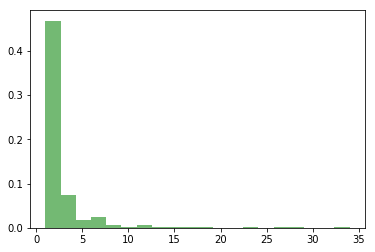

Log-Histogram of word frequencies


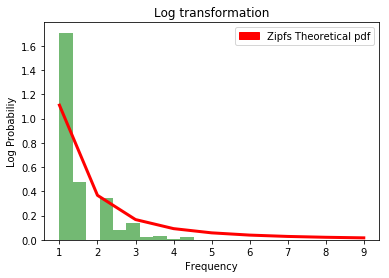

#######################
Distributions of the 2004-GWBush.txt Speech.
#######################
The most common words are: 
('america', 38)
('american', 27)
('peopl', 21)
('nation', 19)
('school', 17)
('health', 17)
('terrorist', 14)
('economi', 14)
('children', 14)
('congress', 13)


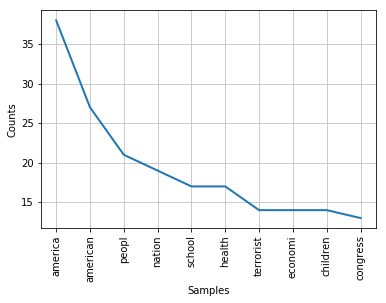

Histogram of word frequencies


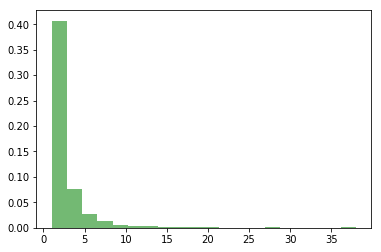

Log-Histogram of word frequencies


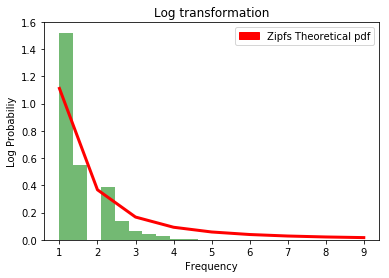

#######################
Distributions of the 2005-GWBush.txt Speech.
#######################
The most common words are: 
('secur', 32)
('freedom', 21)
('america', 20)
('nation', 19)
('countri', 19)
('govern', 18)
('peopl', 18)
('american', 18)
('social', 18)
('congress', 16)


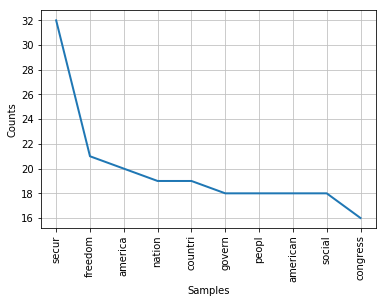

Histogram of word frequencies


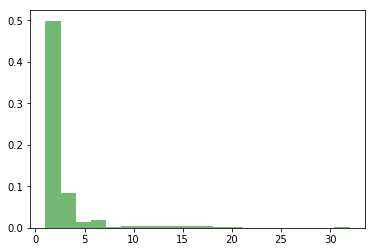

Log-Histogram of word frequencies


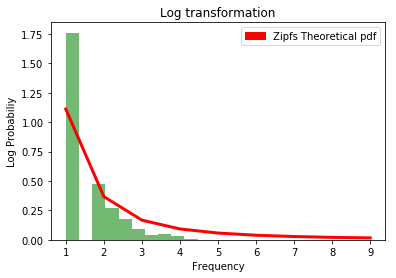

In [7]:
# Now for all the documents
fileIds = state_union.fileids()

for i in range(len(fileIds)):
    
    selectedDocument = fileIds[i - 1]
    # Set up the text to tokenize
    currentDocument = state_union.raw(selectedDocument)  
    # Plot etc.
    print('#######################')
    print('Distributions of the ' + fileIds[i-1] + ' Speech.')
    print('#######################')
    plotFrequencies(currentDocument)




In [8]:
# Join all the documents together

# Define where are we going to store the corpus
#stateUnion_corpus = []
# Get a list of all the titles of the different documents on the corpus
#texts = state_union.fileids()

# Append them into the stateUnion_corpus
#for i in texts:
#    stateUnion_corpus.append(state_union.raw(i))


In [9]:
# Import the vectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the Vectorizer
#vectorizer = TfidfVectorizer(min_df=1, stop_words="english",norm=None)
# Fit the state of the union corpus
#X = vectorizer.fit_transform(stateUnion_corpus)

#print (vectorizer.get_feature_names())
# Do the Term Frequency, Document frequency
# @param tf: term frequency
# @param df: document frequency
# @param N: number of documents

#import numpy
#numpy.around(X.toarray(),1)


In [10]:
#XA = X.toarray()
#for row in XA:
#    n = 18
#    top_n_tfidf = (row.argsort()[-n:][::-1])    
#    for idx in top_n_tfidf:
#        print (vectorizer.get_feature_names()[idx] + "> " + str(row[idx]))
#    print ()
        